In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from scipy.stats import chisquare

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
%matplotlib inline

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['chisquare']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import pandas as pd
import seaborn as sns

df_wine = pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')
df_wine.columns = ['satisfaction_level','last_evaluation','number_project',
        'average_montly_hours','time_spend_company','Work_accident','left',
        'promotion_last_5years','Department','salary']

In [4]:
df_wine.shape

(14999, 10)

In [5]:
df_wine.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [6]:
df_wine.tail(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
df_wine.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [8]:
df_wine.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
df_wine.isnull().values.any()

False

In [10]:
print('left', np.unique(df_wine['left']))

left [0 1]


In [11]:
print(df_wine["left"].value_counts())
(df_wine["left"].value_counts() * 100) / 768

0    11428
1     3571
Name: left, dtype: int64


0    1488.020833
1     464.973958
Name: left, dtype: float64

In [12]:
num_true = len(df_wine.loc[df_wine['left'] == True])
num_false = len(df_wine.loc[df_wine['left'] == False])
print ("Number of left Cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of not left Cases: {0} ({1:2.2f}%)".format(num_false, (num_true / (num_true + num_false)) * 100))

Number of left Cases: 3571 (23.81%)
Number of not left Cases: 11428 (23.81%)


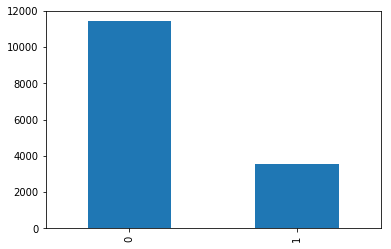

In [13]:
df_wine["left"].value_counts().plot.bar()

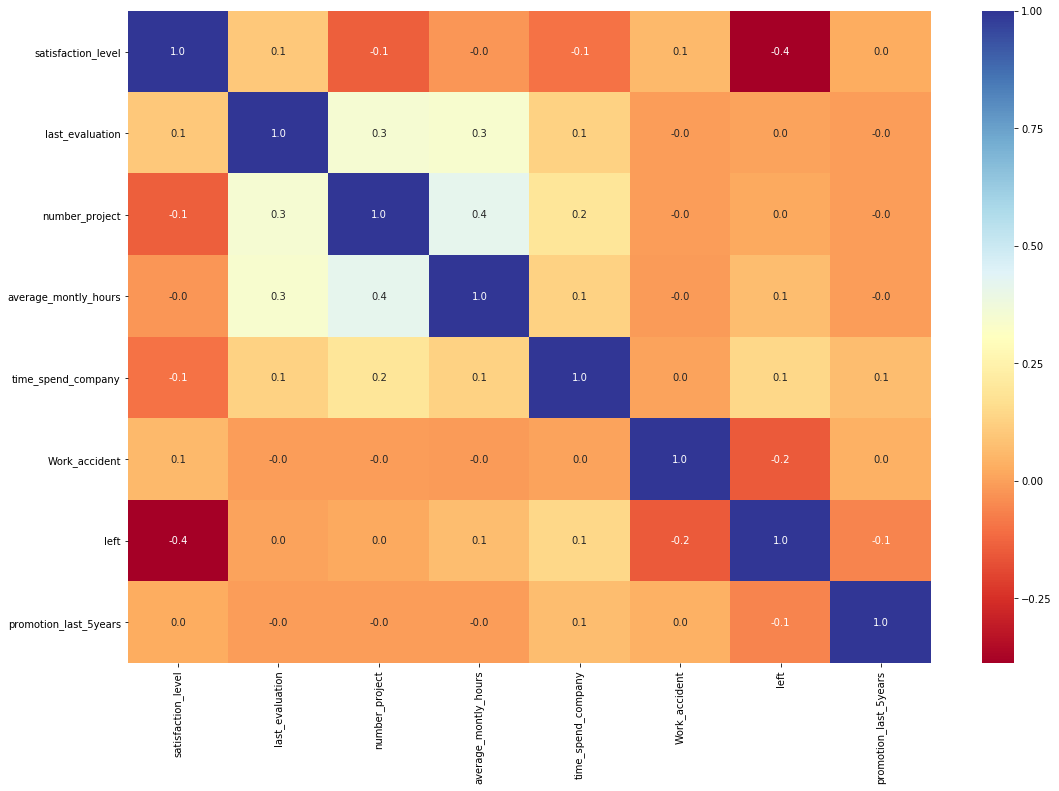

In [14]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_wine.corr(), cmap="RdYlBu", annot=True, fmt=".1f")

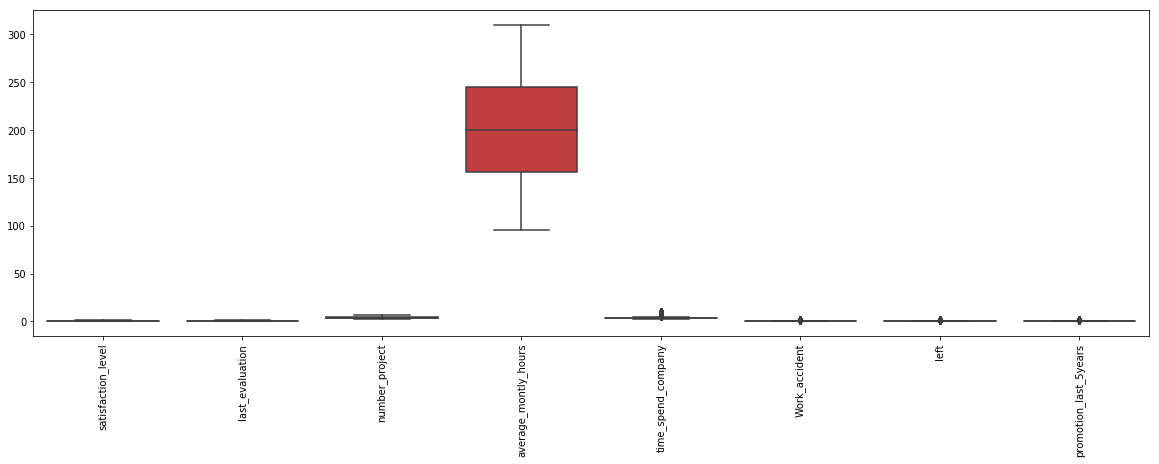

In [15]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = df_wine)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'salary'. 
df_wine['salary']= label_encoder.fit_transform(df_wine['salary']) 
  
df_wine['salary'].unique()

array([1, 2, 0])

In [17]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Department'. 
df_wine['Department']= label_encoder.fit_transform(df_wine['Department']) 
  
df_wine['Department'].unique() 

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [18]:
df_wine.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [19]:
df_wine

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


# Training model

In [20]:
from sklearn.model_selection import train_test_split

feature_column_names = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [21]:
len(X_test), len(X_train)


(4500, 10499)

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Performance Training

In [23]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9978


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Performance Testing

In [24]:
rf_predict_test = rf_model.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9849
Confusion Matrix for Random Forest
[[1013   59]
 [   9 3419]]

Classification Report

              precision    recall  f1-score   support

           1       0.99      0.94      0.97      1072
           0       0.98      1.00      0.99      3428

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



# Create GaussianNBr model object and train it with the data

In [25]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

GaussianNB(priors=None, var_smoothing=1e-09)

# Get current accuracy of the model

In [26]:
# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Training Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Training Accuracy of our GaussianNB model is : 0.7994


# This returns array of predicted results from test_data

In [27]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Test Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))


print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Test Accuracy of our GaussianNB model is: 0.7991 %
Confusion Matrix
[[ 765  307]
 [ 597 2831]]
Classification Report
              precision    recall  f1-score   support

           1       0.56      0.71      0.63      1072
           0       0.90      0.83      0.86      3428

    accuracy                           0.80      4500
   macro avg       0.73      0.77      0.75      4500
weighted avg       0.82      0.80      0.81      4500



# Decision Tree

In [28]:

from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.9731111111111111


# LogisticRegression model

In [29]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))

Training accuracy: 0.7697875988189351
Test accuracy: 0.7611111111111111


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:

logi_regr.intercept_

array([0.])

In [32]:
logi_regr.coef_

array([[-3.99019591,  0.31485415, -0.25962705,  0.00466546,  0.21747847,
        -1.34713339, -1.01844264,  0.0380413 ,  0.01412749]])

In [33]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# SBS Feature selection

In [34]:
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed

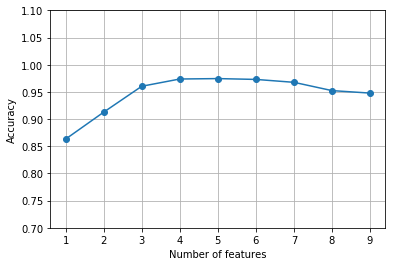

In [36]:
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
ylim([0.7, 1.1])
ylabel('Accuracy')
xlabel('Number of features')
grid()
show()

In [37]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['last_evaluation'], dtype='object')


In [38]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8),
 (0, 1, 2, 4, 5, 6, 7, 8),
 (0, 1, 2, 4, 5, 6, 8),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 6),
 (0, 1, 2, 4),
 (0, 2, 4),
 (0, 4),
 (0,)]

In [39]:
sbs.subsets_[8]

(0,)

In [40]:
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training accuracy: 0.9882845985331936
Test accuracy: 0.9422222222222222


In [41]:
knn.fit(X_train[:, k5], y_train)
print('Training accuracy:', knn.score(X_train[:, k5], y_train))
print('Test accuracy:', knn.score(X_test[:, k5], y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Training accuracy: 0.8748452233546052
Test accuracy: 0.8653333333333333


# RandomForestClassifier

In [42]:

df_wine.columns[:-1]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department'],
      dtype='object')

In [43]:
feat_labels = df_wine.columns[:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 1) satisfaction_level             0.345032
 2) last_evaluation                0.182678
 3) number_project                 0.180379
 4) average_montly_hours           0.143579
 5) time_spend_company             0.121260
 6) Work_accident                  0.012071
 7) left                           0.008336
 8) promotion_last_5years          0.005729
 9) Department                     0.000937


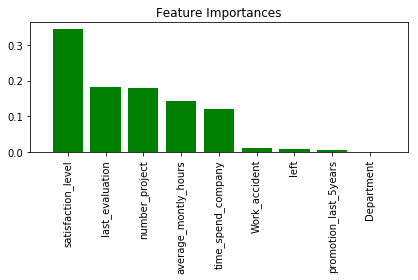

In [44]:
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()

# Chi2 Test

In [45]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])
for i in range(len(df_wine.columns)):
    chi2, p = chisquare(df_wine[df_wine.columns[i]])
    result = result.append([pd.Series([df_wine.columns[i], chi2], index = result.columns)], ignore_index=True)

ValueError: too many values to unpack (expected 2)

In [46]:
pd.set_option("max_column", None)
result = result.sort_values(by="Chi2Weights", ascending=False)
result

,Features,Chi2Weights


In [47]:
print(format(result.Chi2Weights), '.0f')

Series([], Name: Chi2Weights, dtype: object) .0f


In [48]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest','GaussianNB'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_accuracy, dt_score_train, rf_accuracy, accuracy],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata,accuracy ]
    })
models.sort_values(by='Testing_Score', ascending=False)

NameError: name 'logis_score_train' is not defined

> # After feature selection GaussianNB 

In [49]:
feature_column_names = ['satisfaction_level','last_evaluation','number_project',
                        'average_montly_hours','time_spend_company']
predicted_class_name = ['left']

# Getting feature variable values
X = df_wine[feature_column_names].values
y = df_wine[predicted_class_name].values

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [50]:
nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.8032


In [51]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))


print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.7933 %
Confusion Matrix
[[ 442  630]
 [ 300 3128]]
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.41      0.49      1072
           0       0.83      0.91      0.87      3428

    accuracy                           0.79      4500
   macro avg       0.71      0.66      0.68      4500
weighted avg       0.78      0.79      0.78      4500



# RandomForestClassifier

In [52]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
rf_predict_train = rf_model.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9975


In [54]:
rf_predict_test = rf_model.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Accuracy: 0.9864
Confusion Matrix for Random Forest
[[1019   53]
 [   8 3420]]

Classification Report

              precision    recall  f1-score   support

           1       0.99      0.95      0.97      1072
           0       0.98      1.00      0.99      3428

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



# SVC Model

In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_score_train = svm.score(X_train, y_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(X_test, y_test)
print("Testing score: ",svm_score_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score:  0.9635203352700257
Testing score:  0.9526666666666667


# Knn Model

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
knn_predict_train = knn_model.predict(X_train)
knn_accuracy = metrics.accuracy_score(y_train, knn_predict_train)
print ("Accuracy: {0:.4f}".format(knn_accuracy))

Accuracy: 0.9638


In [58]:
knn_predict_test = knn_model.predict(X_test)
knn_accuracy_testdata = metrics.accuracy_score(y_test, knn_predict_test)
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))
print ("Confusion Matrix for K-Neighbors Classifier")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, knn_predict_test, labels=[1, 0])))

Accuracy: 0.9464
Confusion Matrix for K-Neighbors Classifier
[[ 984   88]
 [ 153 3275]]

Classification Report

              precision    recall  f1-score   support

           1       0.87      0.92      0.89      1072
           0       0.97      0.96      0.96      3428

    accuracy                           0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



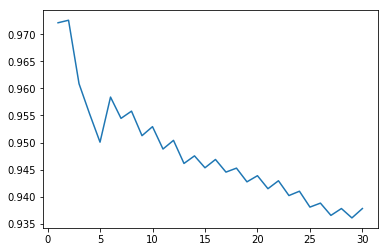

KNN with N-Fold Cross Validation is giving best score as 97.26007545188538% for K=2


In [59]:
k_range=np.arange(1,31,1)
k_score=[]
best_accuracy_score_knn=0
best_k=0
for k in k_range:
    score=cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y.ravel(), cv=10, scoring='accuracy').mean()
    k_score.append(score)
    if best_accuracy_score_knn<score:
        best_accuracy_score_knn=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_knn*100}% for K={best_k}")

# LogisticRegression

In [60]:

logis = LogisticRegression()
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7693113629869511
Testing score:  0.7595555555555555


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision tree

In [61]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  0.9998095056672064
Testing score:  0.9786666666666667


In [62]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest','GaussianNB'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_accuracy, dt_score_train, rf_accuracy, accuracy],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_accuracy_testdata, dt_score_test, rf_accuracy_testdata,accuracy ]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
4,Random Forest,0.997524,0.986444
3,Decision Tree,0.999810,0.978667
1,SVM,0.963520,0.952667
2,kNN,0.963806,0.946444
5,GaussianNB,0.793333,0.793333
0,Logistic Regression,0.769311,0.759556
